Hello there, welcome to the application of process mining for analying robot swarms behaviours.

Adding some libraries

In [830]:
import os, glob
import csv
import seed_change_multiple_times

import shutil
from IPython.utils.io import capture_output
import random
import re

#change this to your path.
dir_tutti="/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti"
%run /home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/Codigos/argos_config.py

Each mision consist on a set of activities, this script works for one mision, but with probability of sucess of: 1, 0.75, 0.5 and 0.25.

First we create a folder for the whole mision, you'll have the "activies" file, where you can find out what mision was being executed.

You will also find 4 folders, where you can find some results for each probability, such as, models, token replay fitness, and metrics for model evaluation.


First thing, we'll create a folder for this mision

In [831]:
# Directory where you want to search for folders
directory = dir_tutti+"/log/Tesis/misiones_controladas/"

# Prefix that should be in the folder names
prefix = "example"

# Find all folders with the "example" prefix in the name
folders = [name for name in os.listdir(directory) if prefix in name]

# Find the highest number in the folder names
numbers = [int(name.replace(prefix, "")) for name in folders]
highest_number = max(numbers) if numbers else 0

# Create the name for the new folder
new_name = f"{prefix}{highest_number + 1}"

# Full path of the new folder
new_folder = os.path.join(directory, new_name)

#Lets created.
if not os.path.exists(new_folder):
    os.mkdir(new_folder)
#inside the folder we need the files, "EventLogs" and "Eventlogs_fail, let's created them"

First we add the activities of the mision.

Go ahead and select the option for a random collection of activities or use manual and instroduce it yourself. (For the manual option there's already an example you can modify)


In [832]:
#use the word "manual" or "random"
mision_activities="manual"

#number of times the mision is repeated to be stored in one log
repetition_numer=50


#duration of the simulation in seconds
timer=60000

actions=12


Copy folder fuction

In [833]:
def copy_folder(source, destination):
    try:
        # Create the new folder if it doesn't exist
        if not os.path.exists(destination):
            os.mkdir(destination)
        # Use the `copytree` function from shutil to copy the folder and its contents
        shutil.copytree(source, os.path.join(destination, os.path.basename(source)))
        print(f"Folder '{os.path.basename(source)}' copied to {destination}")
    except Exception as e:
        print(f"Unable to copy the folder: {e}")

Copy file function

In [834]:
def copy_file(source, destination):
    try:
        # Use the `copy` function from shutil to copy the file
        shutil.copy(source, destination)
        print(f"File copied from {source} to {destination}")
    except Exception as e:
        print(f"Unable to copy the file: {e}")


Activities function

In [835]:
def activities():
    if mision_activities=="manual":   
        ################################ ADD THE ACTIVITIES #######################################################     #delete previos content
        file=dir_tutti+"/log/Tesis/mision_variables/activities.txt"
        with open(file, "w") as f:
            f.write("\n") 
            f.write("\n") 
            f.write("\n") 
            f.write("\n") 
            f.write("activities[\"0_sec\"] = {1,9,2};")
            f.write("\n") 
            f.write("activities[\"1_con\"] = {0,6,7,3,5,1};")
            f.write("\n") 
            f.write("activities[\"2_sec\"] = {11,8,1};")

        file=dir_tutti+"/log/Tesis/mision_variables/activities2.txt"
        with open(file, "w") as f:
            f.write("\n") 
            f.write("\n") 
            f.write("\n") 
            f.write("\n") 
            f.write("activities[\"0_sec\"] = {1,9,2};")
            f.write("\n") 
            f.write("activities[\"1_con\"] = {0,6,7,3,5,1};")
            f.write("\n") 
            f.write("activities[\"2_sec\"] = {11,8,1};")



            ################################ ADD THE ACTIVITIES #######################################################

    if mision_activities=="random":
        #max_total_values = random.choices(numbers_total, weights_t)[0]
        # Número máximo total entre todas las listas
        max_total_values = actions  # Cambiar según sea necesario
        print(f"max: {max_total_values}")

        sum_total = 0
        dictionary_lists = {}

        list_counter = 0
        initial_word = random.choice(["con\"", "sec\""])
        previous_word = initial_word

        while sum_total != max_total_values:
            # Genera una lista de números sin repetición
            minimo = min(6, max_total_values - sum_total)
            if minimo == 1:
                break
            numbers_random = list(range(2, min(6, max_total_values - sum_total) + 1))
            # Asigna el mismo peso a cada número (en este caso, 1)
            weights_n = [1] * len(numbers_random)

            # Elige un número aleatorio con igual probabilidad
            random_number = random.choices(numbers_random, weights_n)[0]

            if sum_total + random_number <= max_total_values:
                sum_total += random_number
            else:
                continue

            if previous_word == "con\"":
                current_word = "sec\""
            else:
                current_word = "con\""

            key = f"\"{list_counter}_{current_word}"

            # Genera números aleatorios con igual probabilidad utilizando random.choices
            if current_word == "con\"":
                # Crear población excluyendo valores ya seleccionados en "con\""
                used_values = set(dictionary_lists.get(f"\"{list_counter}_con\"", []))
                population = set(range(2, 12)) - used_values
                random_numbers = random.sample(population, random_number)
            else:
                random_numbers = random.choices(range(2, 12), k=random_number)

            dictionary_lists[key] = random_numbers
            list_counter += 1
            previous_word = current_word



        print("Total sum:", sum_total)
        print("Dictionary of lists:")

        file=dir_tutti+"/log/Tesis/mision_variables/activities.txt"
        with open(file, "w") as f:        
            for key, lista in dictionary_lists.items():
                print(f'{key}: {lista}')  
                lista_str = ', '.join(map(str, lista))
                f.write("\n") 
                f.write("\n") 
                f.write("\n") 
                f.write("\n") 
                f.write("activities[" + key + "] = {" + lista_str + "};")



In [836]:
from bs4 import BeautifulSoup as bs
import os
import glob
import argparse

def simulacion(directorio, repetition, argos):
    dir_tutti="/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti"
    filelist = glob.glob(os.path.join(directorio+"/EventLogs/", "*"))
    for f in filelist:
        os.remove(f)

    for be in range(0, repetition ):
        
        with open(f"{dir_tutti}/experiments-loop-functions/scenarios/tuttifrutti/{argos}.argos") as fp:
            soup = bs(fp, 'html.parser')
        
        tag = soup.experiment
        tag['random_seed'] = be

        with open(f"{dir_tutti}/experiments-loop-functions/scenarios/tuttifrutti/{argos}.argos", "w") as outf:
            outf.write(str(soup))
        os.system(f"cd {dir_tutti}/experiments-loop-functions")

        os.chdir(f'{dir_tutti}/experiments-loop-functions/build')

        os.system('make')

        os.chdir(f'{dir_tutti}/experiments-loop-functions/scenarios/tuttifrutti/')
        os.system(f"argos3 -c {argos}.argos")

Creating a folder for each posibility of success, and launching the simulation

In [837]:
file_activities=dir_tutti+"/log/Tesis/mision_variables/activities.txt"
seed=f"{dir_tutti}/log/Tesis/Codigos/seed_change_multiple_times.py"
probabilities = [0.25,0.5,0.75,1]
prueba=0.75
activities()
copy_file(file_activities,new_folder )

File copied from /home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/mision_variables/activities.txt to /home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/misiones_controladas/example3


In [838]:


for probability in probabilities:
    path_prob=f"{new_folder}/prob_{probability}"

    file_path=f"{new_folder}/prob_{probability}/EventLogs/"
    if not os.path.exists(file_path):
        os.makedirs(file_path, exist_ok=True)
    file_path2=f"{new_folder}/prob_{probability}/Big_log/"
    if not os.path.exists(file_path2):
        os.makedirs(file_path2, exist_ok=True)


for probability in probabilities:
    with open(f"{dir_tutti}/log/Tesis/mision_variables/activities2.txt", "r") as archivo:
        lineas = archivo.readlines()
    lineas[0] = f"probability={probability};"+"\n"
    lineas[1] = f"events_folder=\"{new_folder}/prob_{probability}\";"+"\n"
    lineas[2] = f"timer_simulation={timer};"+"\n"

    with open(f"{dir_tutti}/log/Tesis/mision_variables/activities2.txt", "w") as archivo:
        archivo.writelines(lineas)
    simulacion(path_prob, repetition_numer, "tuttiTamT2")
    
path_prob=f"{new_folder}/prob_p_{prueba}"
file_path=f"{new_folder}/prob_p_{prueba}/EventLogs/"
if not os.path.exists(file_path):
    os.makedirs(file_path, exist_ok=True)
file_path2=f"{new_folder}/prob_p_{prueba}/Big_log/"
if not os.path.exists(file_path2):
    os.makedirs(file_path2, exist_ok=True)

with open(f"{dir_tutti}/log/Tesis/mision_variables/activities.txt", "r") as archivo:
    lineas = archivo.readlines()
lineas[0] = f"probability={prueba};"+"\n"
lineas[1] = f"events_folder=\"{new_folder}/prob_p_{prueba}\";"+"\n"
lineas[2] = f"timer_simulation={timer};"+"\n"

with open(f"{dir_tutti}/log/Tesis/mision_variables/activities.txt", "w") as archivo:
    archivo.writelines(lineas)
simulacion(path_prob, repetition_numer, "tuttiTamT")

[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 23%] Building CXX object loop-functions/moca/CMakeFiles/tutti_tmt_loopfunc.dir/TuttiTmTLoopFunc.cpp.o


In file included from /home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc.cpp:11:
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc.h:100:5: warning: "/*" within comment [-Wcomment]
  100 |     /*
      |      
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc.cpp: In member function ‘virtual void TuttiTmTLoopFunction::Init(argos::TConfigurationNode&)’:
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc.cpp:42:28: warning: catching polymorphic type ‘class std::exception’ by value [-Wcatch-value=]
   42 |     } catch(std::exception e) {
      |                            ^
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc

[ 25%] Linking CXX shared library libtutti_tmt_loopfunc.so
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 28%] Building CXX object loop-functions/moca/CMakeFiles/tutti_tmt_loopfunc2.dir/TuttiTmTLoopFunc2.cpp.o


In file included from /home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.cpp:11:
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.h:100:5: warning: "/*" within comment [-Wcomment]
  100 |     /*
      |      
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.cpp: In member function ‘virtual void TuttiTmTLoopFunction2::Init(argos::TConfigurationNode&)’:
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.cpp:42:28: warning: catching polymorphic type ‘class std::exception’ by value [-Wcatch-value=]
   42 |     } catch(std::exception e) {
      |                            ^
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoo

[ 30%] Linking CXX shared library libtutti_tmt_loopfunc2.so
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_tmt_loopfunc3
[ 38%] Automatic MOC for target tutti_tmt_loopfunc4
[ 38%] Built target tutti_tmt_loopfunc4_autogen
[ 42%] Built target tutti_tmt_loopfunc4
[ 43%] Automatic MOC for target tutti_tmt_loopfunc5
[ 43%] Built target tutti_tmt_loopfunc5_autogen
[ 47%] Built target tutti_tmt_loopfunc5
[ 48%] Automatic MOC for target tutti_tmt_loopfunc6
[ 48%] Built target tutti_tmt_loopfunc6_autogen
[ 52%] Built target tutti_tmt_loopfunc6
[ 53%] Automatic MOC for target tutti_tmt_loopfunc7
[ 53%] Built target tutti_tmt_loopfunc7_autogen
[ 57%] Built target tutti_tmt_loopfunc7
[ 59%] Automatic MOC for target tutti_tmt_loopfunc8
[ 59%] Built target tutti_tmt_loopfunc8_autogen
[ 63%] Built target tutti_tmt_loopfunc8
[ 64%] Automatic MOC for target tutti_tmt_loopfunc9
[ 64%] B

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


time_out
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_tmt_loopfunc3

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


time_out
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_tmt_loopfunc3

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


time_out
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_tmt_loopfunc3

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 28%] Building CXX object loop-functions/moca/CMakeFiles/tutti_tmt_loopfunc2.dir/TuttiTmTLoopFunc2.cpp.o


In file included from /home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.cpp:11:
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.h:100:5: warning: "/*" within comment [-Wcomment]
  100 |     /*
      |      
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.cpp: In member function ‘virtual void TuttiTmTLoopFunction2::Init(argos::TConfigurationNode&)’:
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.cpp:42:28: warning: catching polymorphic type ‘class std::exception’ by value [-Wcatch-value=]
   42 |     } catch(std::exception e) {
      |                            ^
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoo

[ 30%] Linking CXX shared library libtutti_tmt_loopfunc2.so
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_tmt_loopfunc3
[ 38%] Automatic MOC for target tutti_tmt_loopfunc4
[ 38%] Built target tutti_tmt_loopfunc4_autogen
[ 42%] Built target tutti_tmt_loopfunc4
[ 43%] Automatic MOC for target tutti_tmt_loopfunc5
[ 43%] Built target tutti_tmt_loopfunc5_autogen
[ 47%] Built target tutti_tmt_loopfunc5
[ 48%] Automatic MOC for target tutti_tmt_loopfunc6
[ 48%] Built target tutti_tmt_loopfunc6_autogen
[ 52%] Built target tutti_tmt_loopfunc6
[ 53%] Automatic MOC for target tutti_tmt_loopfunc7
[ 53%] Built target tutti_tmt_loopfunc7_autogen
[ 57%] Built target tutti_tmt_loopfunc7
[ 59%] Automatic MOC for target tutti_tmt_loopfunc8
[ 59%] Built target tutti_tmt_loopfunc8_autogen
[ 63%] Built target tutti_tmt_loopfunc8
[ 64%] Automatic MOC for target tutti_tmt_loopfunc9
[ 64%] B

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_tmt_loopfunc3
[ 38%] A

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 28%] Building CXX object loop-functions/moca/CMakeFiles/tutti_tmt_loopfunc2.dir/TuttiTmTLoopFunc2.cpp.o


In file included from /home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.cpp:11:
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.h:100:5: warning: "/*" within comment [-Wcomment]
  100 |     /*
      |      
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.cpp: In member function ‘virtual void TuttiTmTLoopFunction2::Init(argos::TConfigurationNode&)’:
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.cpp:42:28: warning: catching polymorphic type ‘class std::exception’ by value [-Wcatch-value=]
   42 |     } catch(std::exception e) {
      |                            ^
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoo

[ 30%] Linking CXX shared library libtutti_tmt_loopfunc2.so
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_tmt_loopfunc3
[ 38%] Automatic MOC for target tutti_tmt_loopfunc4
[ 38%] Built target tutti_tmt_loopfunc4_autogen
[ 42%] Built target tutti_tmt_loopfunc4
[ 43%] Automatic MOC for target tutti_tmt_loopfunc5
[ 43%] Built target tutti_tmt_loopfunc5_autogen
[ 47%] Built target tutti_tmt_loopfunc5
[ 48%] Automatic MOC for target tutti_tmt_loopfunc6
[ 48%] Built target tutti_tmt_loopfunc6_autogen
[ 52%] Built target tutti_tmt_loopfunc6
[ 53%] Automatic MOC for target tutti_tmt_loopfunc7
[ 53%] Built target tutti_tmt_loopfunc7_autogen
[ 57%] Built target tutti_tmt_loopfunc7
[ 59%] Automatic MOC for target tutti_tmt_loopfunc8
[ 59%] Built target tutti_tmt_loopfunc8_autogen
[ 63%] Built target tutti_tmt_loopfunc8
[ 64%] Automatic MOC for target tutti_tmt_loopfunc9
[ 64%] B

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 28%] Building CXX object loop-functions/moca/CMakeFiles/tutti_tmt_loopfunc2.dir/TuttiTmTLoopFunc2.cpp.o


In file included from /home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.cpp:11:
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.h:100:5: warning: "/*" within comment [-Wcomment]
  100 |     /*
      |      
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.cpp: In member function ‘virtual void TuttiTmTLoopFunction2::Init(argos::TConfigurationNode&)’:
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc2.cpp:42:28: warning: catching polymorphic type ‘class std::exception’ by value [-Wcatch-value=]
   42 |     } catch(std::exception e) {
      |                            ^
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoo

[ 30%] Linking CXX shared library libtutti_tmt_loopfunc2.so
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_tmt_loopfunc3
[ 38%] Automatic MOC for target tutti_tmt_loopfunc4
[ 38%] Built target tutti_tmt_loopfunc4_autogen
[ 42%] Built target tutti_tmt_loopfunc4
[ 43%] Automatic MOC for target tutti_tmt_loopfunc5
[ 43%] Built target tutti_tmt_loopfunc5_autogen
[ 47%] Built target tutti_tmt_loopfunc5
[ 48%] Automatic MOC for target tutti_tmt_loopfunc6
[ 48%] Built target tutti_tmt_loopfunc6_autogen
[ 52%] Built target tutti_tmt_loopfunc6
[ 53%] Automatic MOC for target tutti_tmt_loopfunc7
[ 53%] Built target tutti_tmt_loopfunc7_autogen
[ 57%] Built target tutti_tmt_loopfunc7
[ 59%] Automatic MOC for target tutti_tmt_loopfunc8
[ 59%] Built target tutti_tmt_loopfunc8_autogen
[ 63%] Built target tutti_tmt_loopfunc8
[ 64%] Automatic MOC for target tutti_tmt_loopfunc9
[ 64%] B

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_tmt_loopfunc3
[ 38%] A

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_

Problem with Attributes in node params


simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 23%] Building CXX object loop-functions/moca/CMakeFiles/tutti_tmt_loopfunc.dir/TuttiTmTLoopFunc.cpp.o


In file included from /home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc.cpp:11:
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc.h:100:5: warning: "/*" within comment [-Wcomment]
  100 |     /*
      |      
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc.cpp: In member function ‘virtual void TuttiTmTLoopFunction::Init(argos::TConfigurationNode&)’:
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc.cpp:42:28: warning: catching polymorphic type ‘class std::exception’ by value [-Wcatch-value=]
   42 |     } catch(std::exception e) {
      |                            ^
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/experiments-loop-functions/loop-functions/moca/TuttiTmTLoopFunc

[ 25%] Linking CXX shared library libtutti_tmt_loopfunc.so
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Built target tutti_tmt_loopfunc3
[ 38%] Automatic MOC for target tutti_tmt_loopfunc4
[ 38%] Built target tutti_tmt_loopfunc4_autogen
[ 42%] Built target tutti_tmt_loopfunc4
[ 43%] Automatic MOC for target tutti_tmt_loopfunc5
[ 43%] Built target tutti_tmt_loopfunc5_autogen
[ 47%] Built target tutti_tmt_loopfunc5
[ 48%] Automatic MOC for target tutti_tmt_loopfunc6
[ 48%] Built target tutti_tmt_loopfunc6_autogen
[ 52%] Built target tutti_tmt_loopfunc6
[ 53%] Automatic MOC for target tutti_tmt_loopfunc7
[ 53%] Built target tutti_tmt_loopfunc7_autogen
[ 57%] Built target tutti_tmt_loopfunc7
[ 59%] Automatic MOC for target tutti_tmt_loopfunc8
[ 59%] Bui

Problem with Attributes in node params


si1
no5suc0
si2
si3
no5suc0
si1
si4
si3
si0
no5suc0
si2
no5suc0
si2
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%]

Problem with Attributes in node params


no5suc0
si1
si0
si2
si0
si2
no5suc0
si1
si1
si2
si3
si0
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built targe

Problem with Attributes in node params


si3
no5suc0
si4
si4
no5suc0
si2
si0
si1
si2
si0
si4
no5suc0
si2
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Bui

Problem with Attributes in node params


no5suc0
si0
si4
no5suc0
si4
si1
si4
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc

Problem with Attributes in node params


si3
si2
si3
no5suc0
no5suc0
si3
si1
si4
si0
si1
si1
si0
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built targe

Problem with Attributes in node params


si0
si1
si0
si3
si1
si2
si1
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autoge

Problem with Attributes in node params


si1
si0
si2
si4
no5suc0
si0
si2
si1
si0
si1
si0
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_

Problem with Attributes in node params


si3
si4
si1
si3
si3
si2
no5suc0
si2
si3
si2
si3
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_

Problem with Attributes in node params


si3
si4
si2
si4
si0
si3
si1
si2
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_au

Problem with Attributes in node params


si4
si3
si0
si0
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Bui

Problem with Attributes in node params


si3
si0
si1
si2
no5suc0
si4
no5suc0
si0
no5suc0
si2
si3
si0
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built t

Problem with Attributes in node params


si2
si2
si2
si0
si4
si0
si3
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autoge

Problem with Attributes in node params


si4
si2
si4
no5suc0
si4
si2
si1
si3
si0
si1
si3
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_

Problem with Attributes in node params


si2
si0
si3
si4
si3
si1
no5suc0
si3
si2
no5suc0
si2
si0
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built targe

Problem with Attributes in node params


si2
no5suc0
si2
si4
si3
si4
si3
no5suc0
si3
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_

Problem with Attributes in node params


no5suc0
si4
si1
si0
si4
si3
si2
si4
si1
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loop

Problem with Attributes in node params


si2
si3
si1
si0
si2
si0
si2
si4
si4
si4
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loop

Problem with Attributes in node params


si4
si0
si3
si1
si3
si0
si3
si4
si3
no5suc0
si1
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_

Problem with Attributes in node params


si3
no5suc0
no5suc0
si4
si0
si3
si4
si1
si0
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_

Problem with Attributes in node params


no5suc0
si4
si1
si3
si0
si4
si0
si3
si0
no5suc0
si3
si2
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built targe

Problem with Attributes in node params


si2
si1
si2
no5suc0
si3
si2
si0
si3
si3
si3
si2
si3
si4
si0
si4
si1
si1
si3
no5suc0
si0
si1
si3
si3
no5suc0
no5suc0
si1
si3
si1
si0
no5suc0
si3
si0
si1
si1
si3
si3
no5suc0
si0
si1
si3
si2
si0
si4
si4
si3
si0
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%]

Problem with Attributes in node params


si4
si1
si2
si3
no5suc0
si4
si3
si1
si2
si1
si3
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_

Problem with Attributes in node params


si2
no5suc0
si3
si2
si0
si3
si3
si4
no5suc0
no5suc0
si0
no5suc0
si4
si1
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 

Problem with Attributes in node params


si1
no5suc0
si1
no5suc0
no5suc0
si1
si4
no5suc0
no5suc0
si0
si2
si4
si3
si3
si4
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loop

Problem with Attributes in node params


si4
si1
si1
si2
si0
si1
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 

Problem with Attributes in node params


si3
si2
no5suc0
no5suc0
si4
si3
si1
si0
no5suc0
si3
no5suc0
si3
si3
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%]

Problem with Attributes in node params


si0
si4
si4
no5suc0
no5suc0
si4
si0
si1
si1
si0
no5suc0
si2
si1
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Bui

Problem with Attributes in node params


si1
no5suc0
si1
no5suc0
no5suc0
si2
si3
si0
si4
si0
si2
si1
no5suc0
no5suc0
si3
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loop

Problem with Attributes in node params


si1
si3
si1
si0
no5suc0
si3
si1
no5suc0
si3
si0
si0
si0
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built targe

Problem with Attributes in node params


si3
si2
no5suc0
si3
no5suc0
no5suc0
no5suc0
si0
si2
si4
si3
si2
si4
si1
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 

Problem with Attributes in node params


si1
si2
si1
si0
si3
no5suc0
si3
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_au

Problem with Attributes in node params


si2
si0
no5suc0
si0
si0
si4
si3
si3
si1
no5suc0
si1
si2
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built targe

Problem with Attributes in node params


si2
si3
si1
si4
si0
si4
si0
si4
si2
si2
no5suc0
si2
si4
si1
no5suc0
si2
si0
si2
si2
si3
si4
no5suc0
si1
no5suc0
si2
no5suc0
si1
si2
no5suc0
si2
si3
si1
si0
si2
si0
si1
si4
si4
si0
si4
si3
si3
si0
si4
si4
no5suc0
si0
si4
si2
no5suc0
no5suc0
no5suc0
si1
si2
si3
si1
si4
si1
si2
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt

Problem with Attributes in node params


no5suc0
si3
si4
si1
si1
si4
si1
si4
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc

Problem with Attributes in node params


si3
si3
no5suc0
no5suc0
si4
no5suc0
si1
si2
si1
si3
no5suc0
no5suc0
si3
si2
si3
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loop

Problem with Attributes in node params


si3
no5suc0
si4
si2
si4
si4
no5suc0
no5suc0
si4
si1
si0
si2
si2
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Bui

Problem with Attributes in node params


si2
si1
si0
no5suc0
no5suc0
no5suc0
si3
si3
si0
si0
si3
si3
si2
si0
si3
no5suc0
si3
si1
si0
si0
no5suc0
si2
no5suc0
si2
si4
si3
si1
si1
no5suc0
si2
no5suc0
no5suc0
si3
si1
si2
no5suc0
si3
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_

Problem with Attributes in node params


no5suc0
no5suc0
si0
si2
si0
si2
si4
si3
si2
si4
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_

Problem with Attributes in node params


si0
si2
si2
si3
si0
si4
si0
si2
si1
no5suc0
si0
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_

Problem with Attributes in node params


si3
no5suc0
si2
no5suc0
si4
si0
si1
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc

Problem with Attributes in node params


si1
si2
no5suc0
si4
no5suc0
no5suc0
si4
si0
si4
si1
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tu

Problem with Attributes in node params


si0
si2
si0
no5suc0
si1
si3
no5suc0
si1
si3
si1
si4
si1
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built targe

Problem with Attributes in node params


no5suc0
si0
si4
si2
si1
si4
si1
si3
si1
no5suc0
no5suc0
si3
no5suc0
si1
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 

Problem with Attributes in node params


si4
si1
si0
si4
si1
si4
si4
si3
si0
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc

Problem with Attributes in node params


si4
si3
si4
si1
no5suc0
si2
si0
si4
no5suc0
si4
si3
si1
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built targe

Problem with Attributes in node params


si1
si3
si1
si4
no5suc0
si2
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autoge

Problem with Attributes in node params


si2
si3
si0
si3
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Built target tutti_tmt_loopfunc3_autogen
[ 36%] Bui

Problem with Attributes in node params


si0
si1
si2
si1
no5suc0
si3
si3
no5suc0
si0
si4
si0
no5suc0
si3
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tutti_tmt_loopfunc2
[ 27%] Built target tutti_tmt_loopfunc2_autogen
[ 31%] Built target tutti_tmt_loopfunc2
[ 32%] Automatic MOC for target tutti_tmt_loopfunc3
[ 32%] Bui

Problem with Attributes in node params


no5suc0
si3
si1
si3
no5suc0
si4
no5suc0
si2
si2
si0
si1
si3
si1
si1
si1
si3
si0
si4
si2
si0
si1
no5suc0
si0
si2
si3
si3
si0
no5suc0
si3
si3
si2
si2
no5suc0
no5suc0
si0
no5suc0
no5suc0
si4
no5suc0
si1
si2
si4
si2
si3
si2
si1
si4
si3
simulation_successful
[  1%] Automatic MOC for target argos3_demiurge_loop_functions
[  1%] Built target argos3_demiurge_loop_functions_autogen
[  5%] Built target argos3_demiurge_loop_functions
[  6%] Automatic MOC for target tutti_st_loopfunc
[  6%] Built target tutti_st_loopfunc_autogen
[ 10%] Built target tutti_st_loopfunc
[ 11%] Automatic MOC for target tutti_ag_loopfunc
[ 11%] Built target tutti_ag_loopfunc_autogen
[ 15%] Built target tutti_ag_loopfunc
[ 17%] Automatic MOC for target tutti_fr_loopfunc
[ 17%] Built target tutti_fr_loopfunc_autogen
[ 21%] Built target tutti_fr_loopfunc
[ 22%] Automatic MOC for target tutti_tmt_loopfunc
[ 22%] Built target tutti_tmt_loopfunc_autogen
[ 26%] Built target tutti_tmt_loopfunc
[ 27%] Automatic MOC for target tu

Problem with Attributes in node params


si3
si4
si2
si1
si2
si4
no5suc0
si0
si1
si1
si4
si4
si4
no5suc0
si4
si0
si1
si3
no5suc0
si1
si0
si0
no5suc0
si2
si1
si0
si0
si3
si1
si3
si3
no5suc0
si1
si0
si1
no5suc0
si0
si1
si4
no5suc0
si4
si0
si3
si3
no5suc0
no5suc0
si0
si3
si3
no5suc0
si3
si1
si2
si0
si1
si0
si2
si4
si3
si2
si1
si1
si4
si3
si3
si3
si2
no5suc0
si3
si0
si4
si3
si0
si4
si4
no5suc0
si0
si0
si3
si3
no5suc0
si4
si2
si0
si0
si1
si2
simulation_successful


Pm4py libraries

In [839]:
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
from datetime import date
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.objects.petri_net.utils.decomposition import decompose
from pm4py.objects.petri_net.utils import reachability_graph
from pm4py.visualization.transition_system import visualizer as ts_visualizer
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
from pm4py.objects.log.util import interval_lifecycle
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator



Function to concatenate all event logs

In [840]:
def split_name(name, prefix):
    parts = re.match(fr'{re.escape(prefix)}seed_([0-9]+)\.csv', name)
    if parts:
        return int(parts.group(1))
    else:
        return -1  # Otra forma de manejar nombres no válidos


def concatenate(folder):
    print((f"{folder}/EventLogs/*.csv"))
    filenames = glob.glob(f"{folder}/EventLogs/*.csv")
    filenames = sorted(filenames, key=lambda x: split_name(x, prefix=f"{folder}/EventLogs/"))
    dfs = []
    model=0
    for filename in filenames:
        log = pd.read_csv(filename, sep=',')
        case_id=[]
        case_id += len(log.mision) * ["mision "+str(model)]
        log['mision']=case_id
        model+=1
        dfs.append(log)
        big_frame = pd.concat(dfs, ignore_index=True)
        #if model==len(filenames):
        big_frame.to_csv(f"{folder}/Big_log/final_log_2.csv", sep=',', index=False)


Create de dataframe for each posibility

In [841]:
for probability in probabilities:
    file_path=f"{new_folder}/prob_{probability}"
    concatenate(file_path)
    events = pd.read_csv(f"{file_path}/Big_log/final_log_2.csv")
    events.columns = ['mision', 'action', 'datetime', 'resource']
    events['datetime'] = pd.to_datetime(events['datetime'])
    if probability==0.25:
        events_low=events
    if probability==0.5:
        events_medium=events
    if probability==0.75:
        events_high=events
    if probability==1:
        events_ideal=events
        
file_path=f"{new_folder}/prob_p_{prueba}"
concatenate(file_path)
events = pd.read_csv(f"{file_path}/Big_log/final_log_2.csv")
events.columns = ['mision', 'action', 'datetime', 'resource']
events['datetime'] = pd.to_datetime(events['datetime'])
events_prueba=events




/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/misiones_controladas/example3/prob_0.25/EventLogs/*.csv
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/misiones_controladas/example3/prob_0.5/EventLogs/*.csv
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/misiones_controladas/example3/prob_0.75/EventLogs/*.csv
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/misiones_controladas/example3/prob_1/EventLogs/*.csv
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/misiones_controladas/example3/prob_p_0.75/EventLogs/*.csv


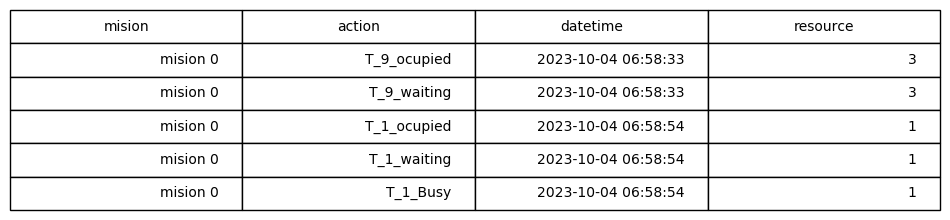

In [842]:
df = pd.DataFrame(events_ideal)

# Obtener el encabezado (head) del DataFrame
df_head = df.head()

# Crear una figura y un eje para la tabla
fig, ax = plt.subplots(figsize=(6, 2))  # Ajusta el tamaño según tus preferencias

# Crear la tabla
tabla = plt.table(cellText=df_head.values, colLabels=df_head.columns, loc='center')

# Configurar el aspecto de la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(2, 2)  # Ajusta el tamaño de la tabla

# Ocultar los ejes
ax.axis('off')

# Guardar la figura como imagen PNG
plt.savefig(f'{new_folder}/tabla_head.png', bbox_inches='tight', pad_inches=0.1, dpi=300)  # Ajusta el nombre del archivo y los ajustes según tus preferencias

# Mostrar la tabla en la pantalla (opcional)
#plt.show()

Converting dataframes to eventlogs accepted by pm4py

In [843]:
events_ideal.rename(columns={'datetime': 'time:timestamp', 'mision': 'case:concept:name', 'action': 'concept:name', 'resource': 'org:resource'}, inplace=True)
events_high.rename(columns={'datetime': 'time:timestamp', 'mision': 'case:concept:name', 'action': 'concept:name', 'resource': 'org:resource'}, inplace=True)
events_medium.rename(columns={'datetime': 'time:timestamp', 'mision': 'case:concept:name', 'action': 'concept:name', 'resource': 'org:resource'}, inplace=True)
events_low.rename(columns={'datetime': 'time:timestamp', 'mision': 'case:concept:name', 'action': 'concept:name', 'resource': 'org:resource'}, inplace=True)
events_prueba.rename(columns={'datetime': 'time:timestamp', 'mision': 'case:concept:name', 'action': 'concept:name', 'resource': 'org:resource'}, inplace=True)
log_pi = log_converter.apply(events_ideal)
log_pv= log_converter.apply(events_ideal)
log_ph = log_converter.apply(events_high)
log_pm = log_converter.apply(events_medium)
log_pl = log_converter.apply(events_low)
log_prueba=log_converter.apply(events_prueba)


Let's make sure our log with probsbility 1 is ideal

First we check for variants

In [844]:
variants = pm4py.get_variants(log_pi)
len(variants)
#variants

/home/epicurus/.local/lib/python3.8/site-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


2

You can filter the log to the most usual variants

In [845]:
k=3
log_variants = pm4py.filter_variants_top_k(log_pi, k)
#log_variants

Since this log is suppose to be ideal, we takeout any execution of the mision that ended up in time-out

In [846]:
log_pi = pm4py.filter_event_attribute_values(log_pi, "concept:name", ["time_out"], level="case", retain=False)

for i in range(13):
    log_pi = pm4py.filter_event_attribute_values(log_pi, "concept:name", [f"T_{i}_rebooting"], level="case", retain=False)

len(log_pi)
#log_no_timeout

50

Modeling the logs

We can get the model using different algorithims, in this case since the random option can reach high levels of concurrencie we'll work with heuristic and inductive miner, alpha is also an option you can comment out if the mision is not high on concurrencie

Alpha miner

In [847]:
def alpha():
    for probability in probabilities:
        file_path=f"{new_folder}/prob_{probability}"
        if probability==0.25:
            net, im, fm = pm4py.discover_petri_net_alpha(log_pl)
            parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
            gviz = pn_visualizer.apply(net, im, fm , parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_pl)
            pn_visualizer.save(gviz, f"{file_path}/Alpha_miner_{probability}.png")
            #pm4py.view_petri_net(net, im, fm)
        if probability==0.5:
            net, im, fm = pm4py.discover_petri_net_alpha(log_pm)
            parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
            gviz = pn_visualizer.apply(net, im, fm , parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_pm)
            pn_visualizer.save(gviz, f"{file_path}/Alpha_miner_{probability}.png")
            #pm4py.view_petri_net(net, im, fm)
        if probability==0.75:
            net, im, fm = pm4py.discover_petri_net_alpha(log_ph)
            parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
            gviz = pn_visualizer.apply(net, im, fm , parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_ph)
            pn_visualizer.save(gviz, f"{file_path}/Alpha_miner_{probability}.png")
            #pm4py.view_petri_net(net, im, fm)
        if probability==1:
            net, im, fm = pm4py.discover_petri_net_alpha(log_pi)
            parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
            gviz = pn_visualizer.apply(net, im, fm , parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_pi)
            pn_visualizer.save(gviz, f"{file_path}/Alpha_miner_{probability}.png")
            #pm4py.view_petri_net(net, im, fm)

alpha()

replaying log with TBR, completed variants ::   0%|          | 0/27 [00:00<?, ?it/s]

/home/epicurus/.local/lib/python3.8/site-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


replaying log with TBR, completed variants ::   0%|          | 0/17 [00:00<?, ?it/s]

/home/epicurus/.local/lib/python3.8/site-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


replaying log with TBR, completed variants ::   0%|          | 0/16 [00:00<?, ?it/s]

/home/epicurus/.local/lib/python3.8/site-packages/pm4py/utils.py:494: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


replaying log with TBR, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]

Heuristic miner

In [848]:
for probability in probabilities:
    file_path=f"{new_folder}/prob_{probability}"
    if probability==0.25:
        net, im, fm = pm4py.discover_petri_net_heuristics(log_pl, dependency_threshold=0.99)
        parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
        gviz = pn_visualizer.apply(net, im, fm , parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_pl)
        pn_visualizer.save(gviz, f"{file_path}/Heuristic_miner_{probability}.png")
        #pm4py.view_petri_net(net, im, fm)
    if probability==0.5:
        net, im, fm = pm4py.discover_petri_net_heuristics(log_pm, dependency_threshold=0.99)
        parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
        gviz = pn_visualizer.apply(net, im, fm , parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_pm)
        pn_visualizer.save(gviz, f"{file_path}/Heuristic_miner_{probability}.png")
        #pm4py.view_petri_net(net, im, fm)
    if probability==0.75:
        net, im, fm = pm4py.discover_petri_net_heuristics(log_ph, dependency_threshold=0.99)
        parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
        gviz = pn_visualizer.apply(net, im, fm , parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_ph)
        pn_visualizer.save(gviz, f"{file_path}/Heuristic_miner_{probability}.png")
        #pm4py.view_petri_net(net, im, fm)
    if probability==1:
        net, im, fm = pm4py.discover_petri_net_heuristics(log_pi, dependency_threshold=0.99)
        parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
        gviz = pn_visualizer.apply(net, im, fm , parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_pi)
        pn_visualizer.save(gviz, f"{file_path}/Heuristic_miner_{probability}.png")
        #pm4py.view_petri_net(net, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/27 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/17 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/16 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]

Inductivo miner

We'll use inductive miner at the end beause we'll use it for conformance checking and like this variables as net, initial_marking, final_marking are saved

In [849]:
for probability in probabilities:
    file_path=f"{new_folder}/prob_{probability}"
    if probability==0.25:
        net, im, fm = pm4py.discover_petri_net_inductive(log_pl)
        parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
        gviz = pn_visualizer.apply(net, im, fm , parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_pl)
        pn_visualizer.save(gviz, f"{file_path}/Inductive_miner_{probability}.png")
        #pm4py.view_petri_net(net, im, fm)
    if probability==0.5:
        net, im, fm = pm4py.discover_petri_net_inductive(log_pm)
        parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
        gviz = pn_visualizer.apply(net, im, fm , parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_pm)
        pn_visualizer.save(gviz, f"{file_path}/Inductive_miner_{probability}.png")
        #pm4py.view_petri_net(net, im, fm)
    if probability==0.75:
        net, im, fm = pm4py.discover_petri_net_inductive(log_ph)
        parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
        gviz = pn_visualizer.apply(net, im, fm , parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_ph)
        pn_visualizer.save(gviz, f"{file_path}/Inductive_miner_{probability}.png")
        #pm4py.view_petri_net(net, im, fm)
    if probability==1:
        net_comp, im_comp, fm_comp = pm4py.discover_petri_net_inductive(log_pi)
        parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
        gviz = pn_visualizer.apply(net_comp, im_comp, fm_comp, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_pi)
        pn_visualizer.save(gviz, f"{file_path}/Inductive_miner_{probability}.png")
        #pm4py.view_petri_net(net, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/27 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/17 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/16 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]

Now, with the posibility of sucess bellow 1 we intend to represent anomalies that may happen in the execution of a mision, therefore, we present someways to discover this anomalies, it will be necessary to adapt the parameters to your needs. 

You can alternate between log_pi, log_ph, log_pm, log_pl 

Checking if all cases happend within a normal range of time

In [850]:

log_performance = pm4py.filter_case_performance(log_ph, 0, 100)
#log_performance

Checking the variants, activities and resources. 


Note: the resource can be exchange between robot and random_seed, to do so go back to the log converter and change the name of the resource


In [851]:
variants = pm4py.get_variants(log_pl)
activities = pm4py.get_event_attribute_values(log_ph, "concept:name")
resources = pm4py.get_event_attribute_values(log_pl, "org:resource")
len(variants)


27

If the probability of failure is too high you may enconter filtering the log to only the most k used variants useful

In [852]:
k=10
log_variantes = pm4py.filter_variants_top_k(log_pl, k)

Filtering the log by atribute, at event level and case level

In [853]:
#You can get all the events containing a attribute
tracefilter_log_event = pm4py.filter_event_attribute_values(log_pm, "org:resource", [6], level="event", retain=False)
#Or all the cases containing a attribute
#tracefilter_log_case = pm4py.filter_event_attribute_values(log_pm, "org:resource", [7], level="case", retain=False)


Checking for cases were two activities are follow by one anohter.
example: how many times an activity rebooted when x activity happend first

In [854]:
Log_between = pm4py.filter_between(log_pl, "T_49_Busy", "T_49_rebooting")

To eliminate noise, we can eliminte logs that are too long (rework) or too short (incompleate)

In [855]:
log_by_size = pm4py.filter_case_size(log_pm, 0,10 )


Checking for activities happening more than k times

In [856]:
k=1
filtered_log = pm4py.filter_activities_rework(log_pl, 'simulation_successful', k)


A great tool that allows us to check exactly activities that follow one another are directly follows diagrams, we have some bellow

In [857]:
for probability in probabilities:
    file_path=f"{new_folder}/prob_{probability}"
    if probability==0.25:
        performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(log_pl)
        pm4py.save_vis_performance_dfg(performance_dfg, start_activities, end_activities, f'{file_path}/dfg_{probability}.svg')
    if probability==0.5:
        performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(log_pm)
        pm4py.save_vis_performance_dfg(performance_dfg, start_activities, end_activities, f'{file_path}/dfg_{probability}.svg')
    if probability==0.75:
        performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(log_ph)
        pm4py.save_vis_performance_dfg(performance_dfg, start_activities, end_activities, f'{file_path}/dfg_{probability}.svg')
    if probability==1:
        performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(log_pi)
        pm4py.save_vis_performance_dfg(performance_dfg, start_activities, end_activities, f'{file_path}/dfg_{probability}.svg')


If the model is too complicated, but you want to analize it visually you can decompose it into smaller pieces, here you have the code

In [858]:

net_f, initial_marking_f, final_marking_f = pm4py.discover_petri_net_inductive(log_pl)
list_nets = decompose(net_f, initial_marking_f, final_marking_f)
for index, model in enumerate(list_nets):
    subnet, s_im, s_fm = model
    #pm4py.view_petri_net(subnet, s_im, s_fm)

Conformance Checking

Token-based replay

 Based on this comparison, token replay provides insights into whether the recorded process adheres to the expected process model. It can identify deviations, missing steps, or extra steps in the actual process.

In [859]:
def traces(log,folder_prob):
    # Create a list to store trace results
    trace_results_list = []

    replayed_traces = pm4py.conformance_diagnostics_token_based_replay(log, net_comp, im_comp, fm_comp)

    # Iterate through the replayed traces and access conformance metrics for each trace
    for i, trace_result in enumerate(replayed_traces, start=1):
        trace_is_fit = trace_result['trace_is_fit']  # Boolean indicating if the trace fits the model
        trace_fitness = trace_result['trace_fitness']  # Fitness value for the trace
        missing_tokens = trace_result['missing_tokens']  # Number of missing tokens
        consumed_tokens = trace_result['consumed_tokens']  # Number of consumed tokens
        remaining_tokens = trace_result['remaining_tokens']  # Number of remaining tokens
        produced_tokens = trace_result['produced_tokens']  # Number of produced tokens

        # Create a dictionary to store trace results
        trace_result_dict = {
            "Trace Number": i,
            "Trace Is Fit": trace_is_fit,
            "Trace Fitness": trace_fitness,
            "Missing Tokens": missing_tokens,
            "Consumed Tokens": consumed_tokens,
            "Remaining Tokens": remaining_tokens,
            "Produced Tokens": produced_tokens
        }

        # Append the trace result dictionary to the list
        trace_results_list.append(trace_result_dict)

        # Access other information as needed
        activated_transitions = trace_result['activated_transitions']
        reached_marking = trace_result['reached_marking']
        transitions_with_problems = trace_result['transitions_with_problems']
        enabled_transitions_in_marking = trace_result['enabled_transitions_in_marking']
    # Define the path to the CSV file
    csv_file_path = folder_prob+"/trace_results.csv"

    # Define the CSV fieldnames
    fieldnames = ["Trace Number", "Trace Is Fit", "Trace Fitness", "Missing Tokens", "Consumed Tokens", "Remaining Tokens", "Produced Tokens"]

    # Write the trace results to a CSV file with separators
    

    with open(csv_file_path, mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        
        # Write the header row
        writer.writeheader()
        
        for trace_result_dict in trace_results_list:
            # Write the trace results
            writer.writerow(trace_result_dict)
            
            # Write a separator row
            writer.writerow({key: '-' * 10 for key in fieldnames})
    
    print(f"Trace results have been exported to {csv_file_path}")


In [860]:
from pm4py.algo.conformance.tokenreplay.diagnostics import duration_diagnostics

for probability in probabilities:
    file_path=f"{new_folder}/prob_{probability}"
    if probability==0.25:
        traces(log_pl,file_path )
    if probability==0.5:
        traces(log_pm,file_path )
    if probability==0.75:
        traces(log_ph,file_path )


replaying log with TBR, completed variants ::   0%|          | 0/27 [00:00<?, ?it/s]

Trace results have been exported to /home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/misiones_controladas/example3/prob_0.25/trace_results.csv


replaying log with TBR, completed variants ::   0%|          | 0/17 [00:00<?, ?it/s]

Trace results have been exported to /home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/misiones_controladas/example3/prob_0.5/trace_results.csv


replaying log with TBR, completed variants ::   0%|          | 0/16 [00:00<?, ?it/s]

Trace results have been exported to /home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/misiones_controladas/example3/prob_0.75/trace_results.csv


Diagnostics (TBR)


"The execution of token-based replay in pm4py permits to obtain detailed information about transitions that did not execute correctly, or activities that are in the log and not in the model. In particular, executions that do not match the model are expected to take longer throughput time."

In [861]:

def diagnosis(log, folder_prob):
    unpredicted_activity_details = []
    resource_count = {}  # Diccionario para contar la cantidad de veces que cada recurso realiza actividades no deseadas
    resource_count_2={}
    for trace in log:
        # Acceder a los atributos en el nivel superior de la traza
        attributes = trace.attributes
        for event in trace:
            activity_name = event['concept:name']
            resource_t = event.get('org:resource', '')
            if resource_t in resource_count_2:
                resource_count_2[resource_t] += 1
            else:
                resource_count_2[resource_t] = 1
            if activity_name not in [transition.label for transition in net_comp.transitions]:
                # Obtener detalles adicionales del evento
                case_id = attributes.get('concept:name', '')  # Obtener el valor de 'concept:name' o una cadena vacía si no existe
                timestamp = event.get('time:timestamp', '')
                resource = event.get('org:resource', '')
                # Agregar detalles de la actividad no prevista al conjunto de datos
                unpredicted_activity_details.append({
                    "ID case": case_id,
                    "Activity": activity_name,
                    "Time_Stamp": timestamp,
                    "Resource": resource,
                    "Event": event  # Agregar el evento completo
                })
                
                # Actualizar el contador de recursos para actividades no deseadas
                if resource in resource_count:
                    resource_count[resource] += 1
                else:
                    resource_count[resource] = 1

    # Path to the output CSV file
    csv_file_path = folder_prob + "/unpredicted_activities.csv"

    # Create or open the CSV file in write mode
    with open(csv_file_path, mode='w', newline='') as csv_file:
        # Define the columns of the CSV file
        fieldnames = ["ID_case", "Activity", "Time_Stamp", "Resource"]

        # Create the CSV writer
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        # Write the header row to the CSV file
        csv_writer.writeheader()

        # Write unpredicted activity details to the CSV file
        for activity_details in unpredicted_activity_details:
            csv_writer.writerow({
                "ID_case": activity_details["ID case"],
                "Activity": activity_details["Activity"],
                "Time_Stamp": activity_details["Time_Stamp"],
                "Resource": activity_details["Resource"]
            })
            csv_writer.writerow({})

    print(f"Unpredicted activity details have been saved to '{csv_file_path}'.")

    # Encuentra el recurso con la mayoría de actividades no deseadas
    if  resource_count:
        most_unwanted_resource = max(resource_count, key=resource_count.get)
        count_of_unwanted_activities = resource_count[most_unwanted_resource]
    if resource_count:
    # Path para el archivo de texto
        txt_file_path = folder_prob + "/unwanted_resource_activities.txt"

        # Abrir el archivo de texto en modo escritura
        with open(txt_file_path, mode='w') as txt_file:
            for resource2, count2 in resource_count_2.items():
                if resource2!="user":
                    txt_file.write(f"Robot_{resource2}: {count2} actividades_totales\n")
            # Recorrer el diccionario resource_count y escribir los detalles en el archivo
            for resource, count in resource_count.items():
                if resource!="user":
                    txt_file.write(f"Robot_{resource}: {count} actividades_fallidas.\n")

        print(f"Detalles de recursos involucrados en actividades no deseadas han sido guardados en '{txt_file_path}'.")
    else:
        print("No se encontraron actividades no deseadas en el registro.")
    if  resource_count:
        print(f"El recurso '{most_unwanted_resource}' realizó {count_of_unwanted_activities} actividades no deseadas.")

    actividades_totales = [0] * 6
    actividades_fallidas = [0] * 6

    with open(txt_file_path, 'r') as archivo:
        print(txt_file_path)
        # Lee cada línea del archivo
        for linea in archivo:
            # Divide la línea en dos partes en función del ':' como separador
            etiqueta, valor = linea.strip().split(': ')
            
            # Extrae el número de actividades_totales o actividades_fallidas
            numero = int(valor.split()[0])
            
            # Extrae el número de robot de la etiqueta
            numero_robot = int(etiqueta.split('_')[1])
            
            # Comprueba el contenido de "valor" para determinar si es "actividades_totales" o "actividades_fallidas"
            if "actividades_totales" in valor:
                actividades_totales[numero_robot] = numero
            elif "actividades_fallidas" in valor:
                actividades_fallidas[numero_robot] = numero

    # Imprime los resultados para verificar
    print("actividades_totales:", actividades_totales)
    print("actividades_fallidas:", actividades_fallidas)

    # Datos de ejemplo para actividades y actividades fallidas
    etiquetas = ["r0","r1", "r2", "r3", "r4", "r5"]
    ancho_barra = 0.35
    # Coordenadas para las etiquetas en el eje x
    x = range(len(etiquetas))
    # Crear el gráfico de barras
    plt.bar(x, actividades_totales, width=ancho_barra, label="Actividades Totales", align="center")
    plt.bar([i + ancho_barra for i in x], actividades_fallidas, width=ancho_barra, label="Actividades Fallidas", align="center")
    # Etiquetas en el eje x
    plt.xticks([i + ancho_barra / 2 for i in x], etiquetas)
    # Etiqueta del eje y
    plt.ylabel("Cantidad")
    # Título del gráfico
    plt.title("Actividades Totales y Actividades Fallidas realizadas por Robot")
    # Leyenda
    plt.legend()
    plt.savefig(f'{folder_prob}/deteccion_robot.png')
    

Unpredicted activity details have been saved to '/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/misiones_controladas/example3/prob_0.25/unpredicted_activities.csv'.
Detalles de recursos involucrados en actividades no deseadas han sido guardados en '/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/misiones_controladas/example3/prob_0.25/unwanted_resource_activities.txt'.
El recurso '0' realizó 556 actividades no deseadas.
/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/misiones_controladas/example3/prob_0.25/unwanted_resource_activities.txt
actividades_totales: [2321, 2256, 2180, 2234, 2247, 2202]
actividades_fallidas: [556, 526, 517, 522, 525, 519]
Unpredicted activity details have been saved to '/home/epicurus/dgarzon/jdiaz/argos3-installation/tuttifrutti/log/Tesis/misiones_controladas/example3/prob_0.5/unpredicted_activities.csv'.
Detalles de recursos involucrados en actividades no deseadas han sido guardados en '/h

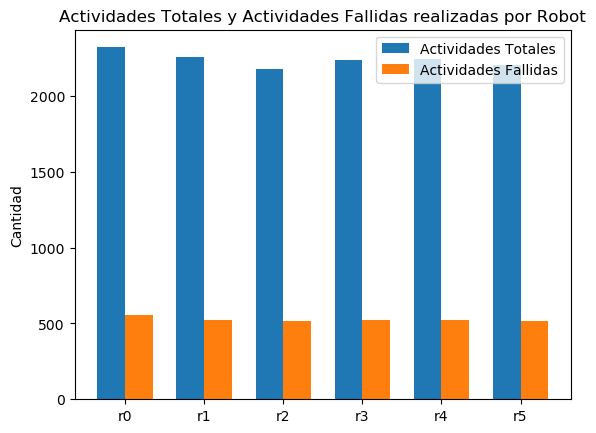

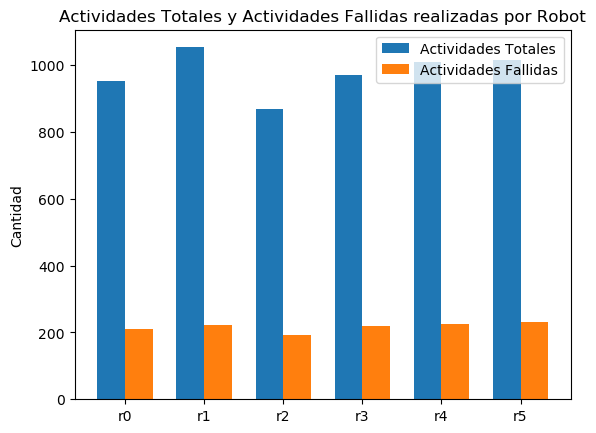

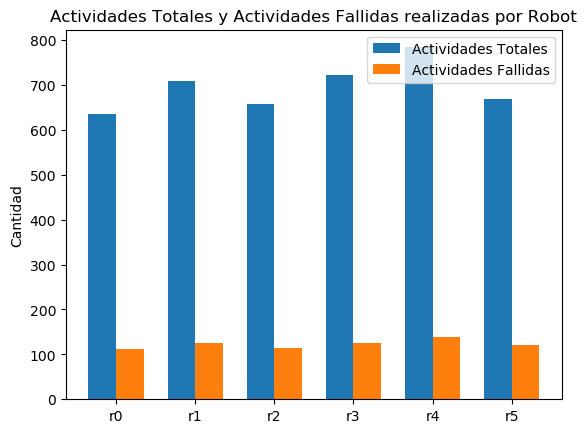

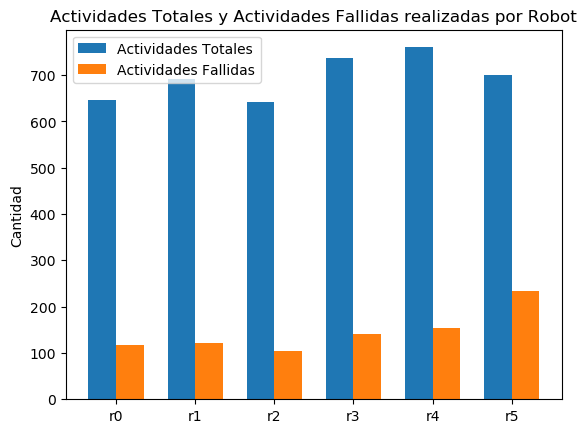

In [862]:
for probability in probabilities:
    plt.figure()
    
    file_path=f"{new_folder}/prob_{probability}"
    if probability==0.25:
        diagnosis(log_pl,file_path )
    if probability==0.5:
        diagnosis(log_pm,file_path )
    if probability==0.75:
        diagnosis(log_ph,file_path )

file_path=f"{new_folder}/prob_p_{prueba}"
diagnosis(log_prueba,file_path )

Checking Throughput Time


In [863]:
all_case_durations = pm4py.get_all_case_durations(log_pi)


Cycle Time and Waiting Time


In [864]:
enriched_log = interval_lifecycle.assign_lead_cycle_time(log_pl)


Distribución de la duración de un caso

x es un conjunto de valores que representan la duración de los casos. Cada valor en x corresponde a un valor de duración de caso.

y es un conjunto de valores que representan la densidad estimada para cada valor de duración de caso. En otras palabras, y muestra cuán densamente se distribuyen los casos en función de su duración. Un valor alto en y indica una mayor densidad de casos en ese intervalo de duración.

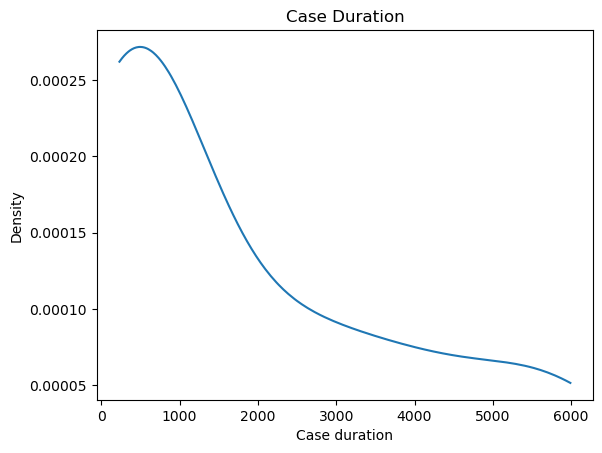

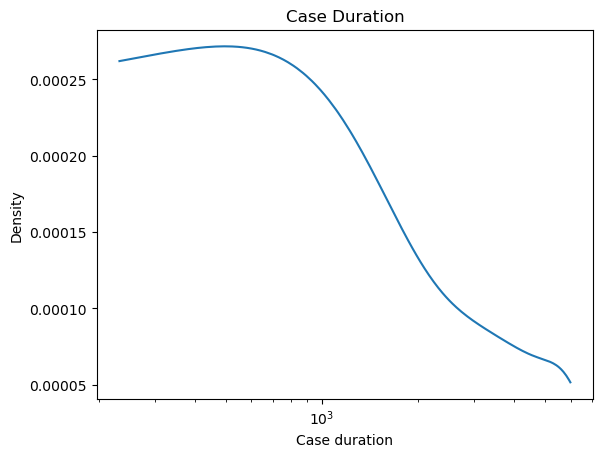

In [865]:

from pm4py.util import constants
from pm4py.statistics.traces.generic.log import case_statistics
x, y = case_statistics.get_kde_caseduration(log_pl, parameters={constants.PARAMETER_CONSTANT_TIMESTAMP_KEY: "time:timestamp"})

from pm4py.visualization.graphs import visualizer as graphs_visualizer

gviz = graphs_visualizer.apply_plot(x, y, variant=graphs_visualizer.Variants.CASES)
graphs_visualizer.view(gviz)

gviz = graphs_visualizer.apply_semilogx(x, y, variant=graphs_visualizer.Variants.CASES)
graphs_visualizer.view(gviz)
                                    

Distribution of events over time

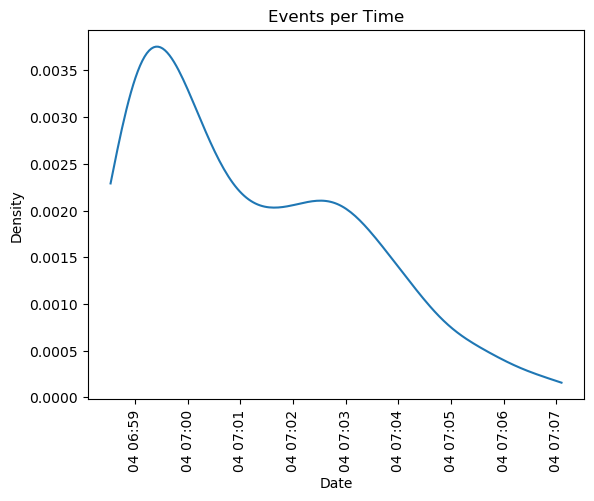

In [866]:
from pm4py.algo.filtering.log.attributes import attributes_filter
import numpy as np  # Importa NumPy

x, y = attributes_filter.get_kde_date_attribute(log_pi, attribute="time:timestamp")

# Convierte x e y en arreglos de NumPy
x = np.array(x)
y = np.array(y)

from pm4py.visualization.graphs import visualizer as graphs_visualizer

gviz = graphs_visualizer.apply_plot(x, y, variant=graphs_visualizer.Variants.DATES)
graphs_visualizer.view(gviz)

Let's make some diagnosis to evaluate our model and logs

In [867]:
def write(file_write,form,fitness_str_t, prec_t,gen,simp):
    with open(file_write, form) as file:
        file.write("\n")
        file.write(f"Example:{new_name}\n")
        file.write(f"actions: {actions}"+"\n")
        file.write(f"probability:{probability}\n")
        file.write(fitness_str_t+"\n")
        file.write(prec_t+"\n")

        file.write(gen+"\n")
        file.write(simp+"\n")
        file.write("\n")


In [868]:
from pm4py.algo.conformance.alignments.decomposed import algorithm as decomp_alignments
from pm4py.algo.evaluation.replay_fitness import algorithm as rp_fitness_evaluator


for probability in probabilities:
    file_path=f"{new_folder}/prob_{probability}"
    if probability==0.25:
        log_dig=log_pl
        folder_prob=f"{dir_tutti}/log/Tesis/model_evaluation_0.25.txt"

    if probability==0.5:
        log_dig=log_pm
        folder_prob=f"{dir_tutti}/log/Tesis/model_evaluation_0.5.txt"

    if probability==0.75:
        log_dig=log_ph
        folder_prob=f"{dir_tutti}/log/Tesis/model_evaluation_0.75.txt"
    if probability==1:
        log_dig=log_pi
        folder_prob=f"{dir_tutti}/log/Tesis/model_evaluation_1.txt"
    
    fitness_t = pm4py.fitness_token_based_replay(log_dig, net_comp, im_comp, fm_comp)
    # Initialize an empty string to build the dictionary representation
    fitness_str_t = ""
    # Build the string with spaces and line breaks between each element
    for key, value in fitness_t.items():
        fitness_str_t += f"{key}: {value}\n"

    prec_t = pm4py.precision_token_based_replay(log_dig, net_comp, im_comp, fm_comp)

    prec_t = "precision: "+ str(prec_t)

    gen = generalization_evaluator.apply(log_dig, net_comp, im_comp, fm_comp)
    gen="generalization: " + str(gen)

    simp = simplicity_evaluator.apply(net_comp)
    simp= "simplicity: " + str(simp)
    # Save the string to a text file, overwriting the previous content
    write(f"{file_path}/model_evaluation.txt", "w", fitness_str_t, prec_t,gen,simp)
    write(f"{file_path}/model_evaluation.txt", "w", fitness_str_t, prec_t,gen,simp)
    write(f"{new_folder}/model_evaluation.txt", "a", fitness_str_t, prec_t,gen,simp)
    write(f"{folder_prob}", "a", fitness_str_t, prec_t,gen,simp)
    if not os.path.exists(f"{dir_tutti}/log/Tesis/misiones_controladas/acciones_{actions}/"):
        os.makedirs(f"{dir_tutti}/log/Tesis/misiones_controladas/acciones_{actions}/",  exist_ok=True)
    write(f"{dir_tutti}/log/Tesis/misiones_controladas/acciones_{actions}/prob_{probability}.txt", "a", fitness_str_t, prec_t,gen,simp)
        



replaying log with TBR, completed variants ::   0%|          | 0/27 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/12137 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/27 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/17 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/4638 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/17 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/16 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2906 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/16 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/56 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]